<a href="https://colab.research.google.com/github/shintafiaa/Kampus-Merdeka-ML-Terapan/blob/main/1_Diamond_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Belajar Predictive Analisis

Kampus Merdeka - Dicoding - Machine Learning Terapan

Kasus prediksi diamond

In [ ]:
#APRIL H MARBUN-110320239

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [12]:
#load dataset
url = '/content/heart.csv'
diamonds = pd.read_csv(url)
diamonds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Harga dalam dolar Amerika Serikat ($) adalah fitur target.

carat: merepresentasikan bobot (weight)
dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.

cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).

color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).

clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))

x: merepresentasikan panjang diamonds dalam mm (0-10.74).

y: merepresentasikan lebar diamonds dalam mm (0-58.9).

z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).

depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).

table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

In [13]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
#cek deskripsi statistik
diamonds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
x = (diamonds['slope'] == 0).sum()
y = (diamonds['ca'] == 0).sum()
z = (diamonds['thal'] == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)


Nilai 0 di kolom x ada:  578
Nilai 0 di kolom y ada:  74
Nilai 0 di kolom z ada:  7


Cek apakah data yang bernilai 0 pada suatu dimensi juga terdapat pada dimensi lain?

Cek dari kolom z yang memiliki jumlah missing value terbanyak.

In [25]:
diamonds.loc[(diamonds['slope']==0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
30,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
948,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
968,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


Didapatkan informasi: seluruh data yang bernilai 0 pada kolom x ataupun kolom y juga memiliki nilai 0 pada kolom z.

In [26]:
#Hapus missing value
#Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['slope','ca','thal']]!=0).all(axis=1)]

#cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(425, 14)

In [27]:
#cek kembali adakah nilai 0 pada data
diamonds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,58.021176,0.771765,0.736471,132.138824,250.355294,0.197647,0.470588,142.249412,0.442353,1.235529,1.409412,1.715294,2.461176,0.254118
std,7.506100,0.420190,1.000571,16.998391,50.095601,0.398694,0.518257,22.647919,0.497251,1.137041,0.492305,0.866775,0.628733,0.435877
min,38.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,54.000000,1.000000,0.000000,120.000000,218.000000,0.000000,0.000000,126.000000,0.000000,0.100000,1.000000,1.000000,2.000000,0.000000
50%,58.000000,1.000000,0.000000,130.000000,248.000000,0.000000,0.000000,144.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000
75%,63.000000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,161.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,417.000000,1.000000,2.000000,195.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='age'>

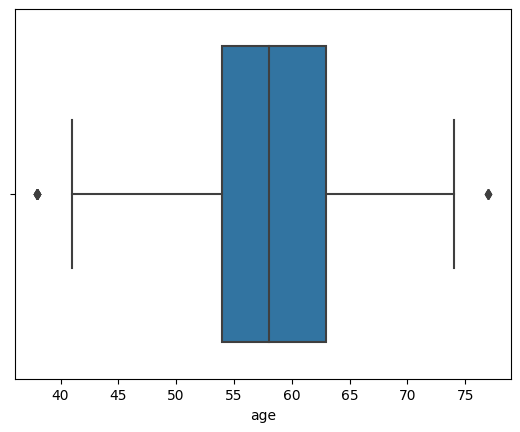

In [29]:
sns.boxplot(x=diamonds['age'])

<Axes: xlabel='sex'>

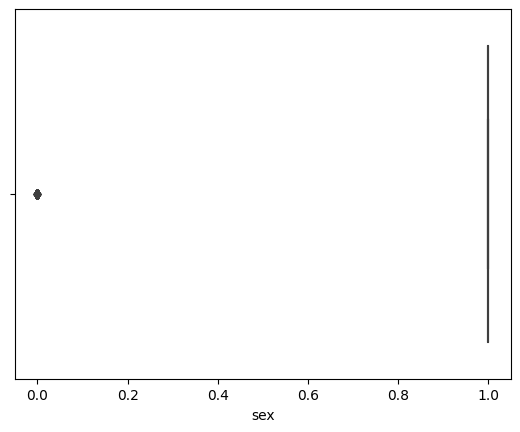

In [30]:
sns.boxplot(x=diamonds['sex'])

<Axes: xlabel='cp'>

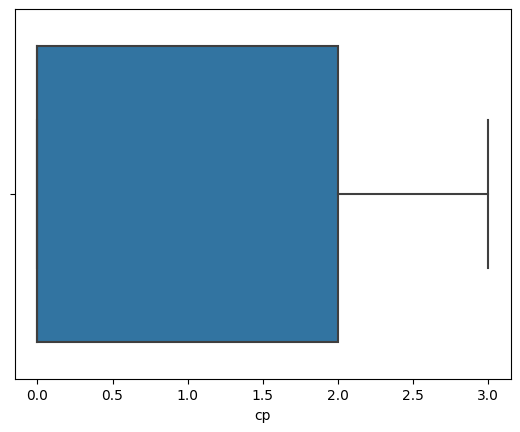

In [31]:
sns.boxplot(x=diamonds['cp'])

<Axes: xlabel='trestbps'>

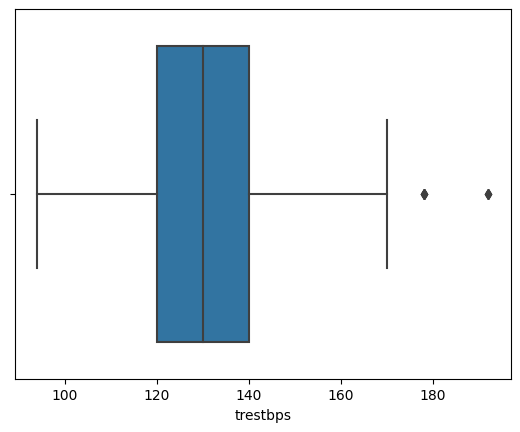

In [32]:
sns.boxplot(x=diamonds['trestbps'])

<Axes: xlabel='slope'>

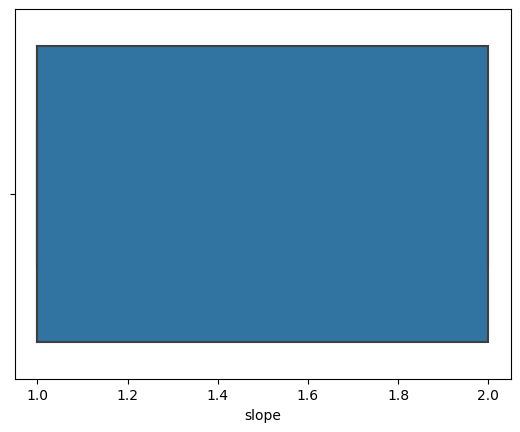

In [33]:
sns.boxplot(x=diamonds['slope'])

<Axes: xlabel='ca'>

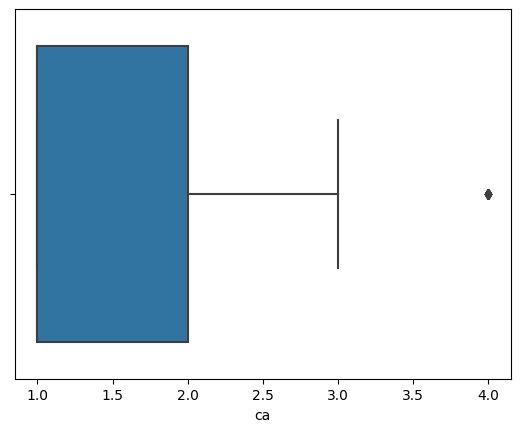

In [34]:
sns.boxplot(x=diamonds['ca'])

<Axes: xlabel='thal'>

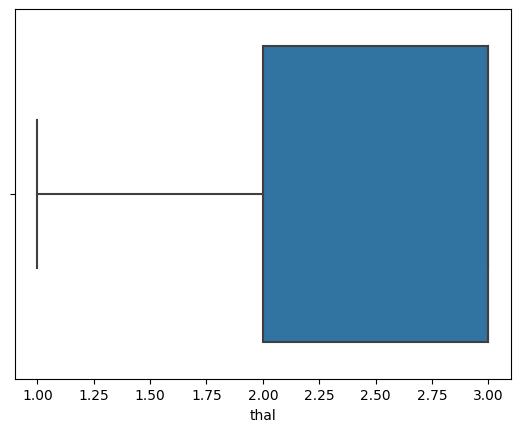

In [35]:
sns.boxplot(x=diamonds['thal'])

Membuat batas atas dan batas bawah

Batas bawah = Q1 - 1.5 * IQR
Batas atas = Q3 + 1.5 * IQR

In [36]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

(248, 14)

Dataset sudah bersih.

<Axes: xlabel='ca'>

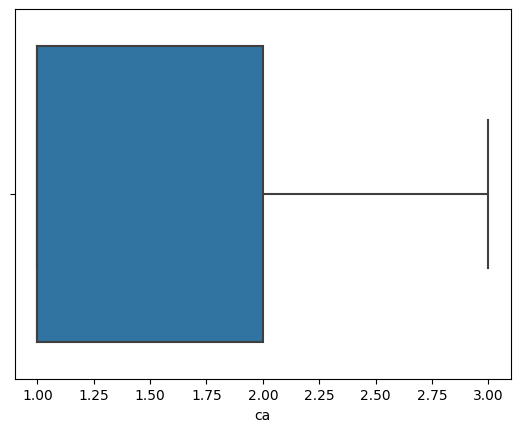

In [38]:
#tes lihat satu visualisasi boxplot
sns.boxplot(x=diamonds['ca'])

**ANALISIS DATA DENGAN TEKNIK UNIVARIATE EDA**

In [41]:
#pisahkan fitur dataset numerical dan categorical
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal','target']

Analisis fitur kategori

   jumlah sampel  persentase
1            248       100.0


<Axes: title={'center': 'sex'}>

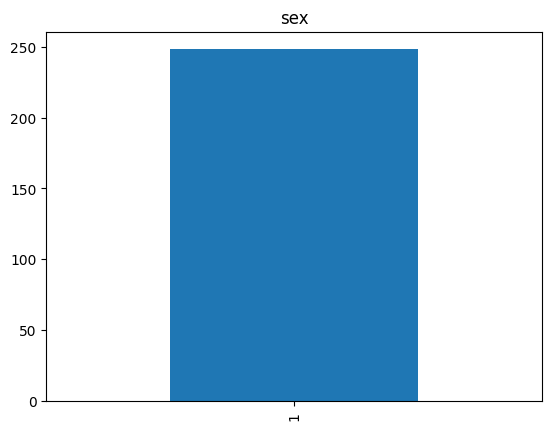

In [43]:
#Fitur kategorikal 'cut'
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Pada fitur cut, terdapat 5 kategori (ideal, premium, very good, good, fair). Lebih dari 60% didominasi oleh grade ideal dan premium.

   jumlah sampel  persentase
0            179        72.2
2             41        16.5
3             14         5.6
1             14         5.6


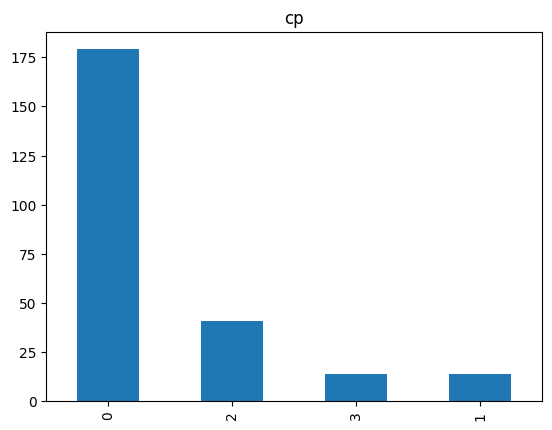

In [44]:
#fitur kategorikal 'color'
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Deskripsi variabel:
Kategori warna dari yang paling bagus menuju paling buruk adalah sebagai berikut D, E, F, G, H, I, J.

   jumlah sampel  persentase
0            248       100.0


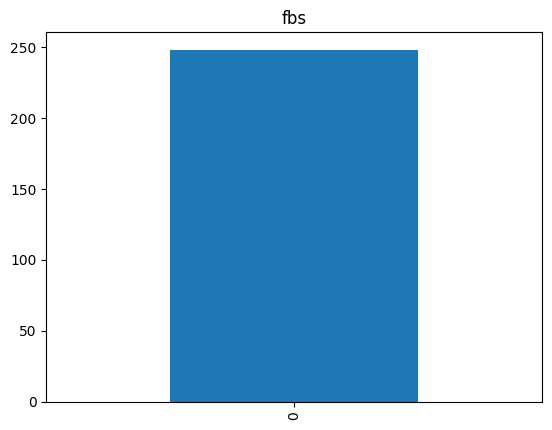

In [45]:
#fitur kategorikal 'clarity'
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Deskripsi variabel:

8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

'IF' - Internally Flawless

'VVS2' - Very Very Slight Inclusions

'VVS1' - Very Very Slight Inclusions

'VS1' - Very Slight Inclusions

'VS2' - Very Slight Inclusions

'SI2' - Slight Inclusions

'SI1' - Slight Inclusions

'I1' - Imperfect

**Analisis Numerical Feature**

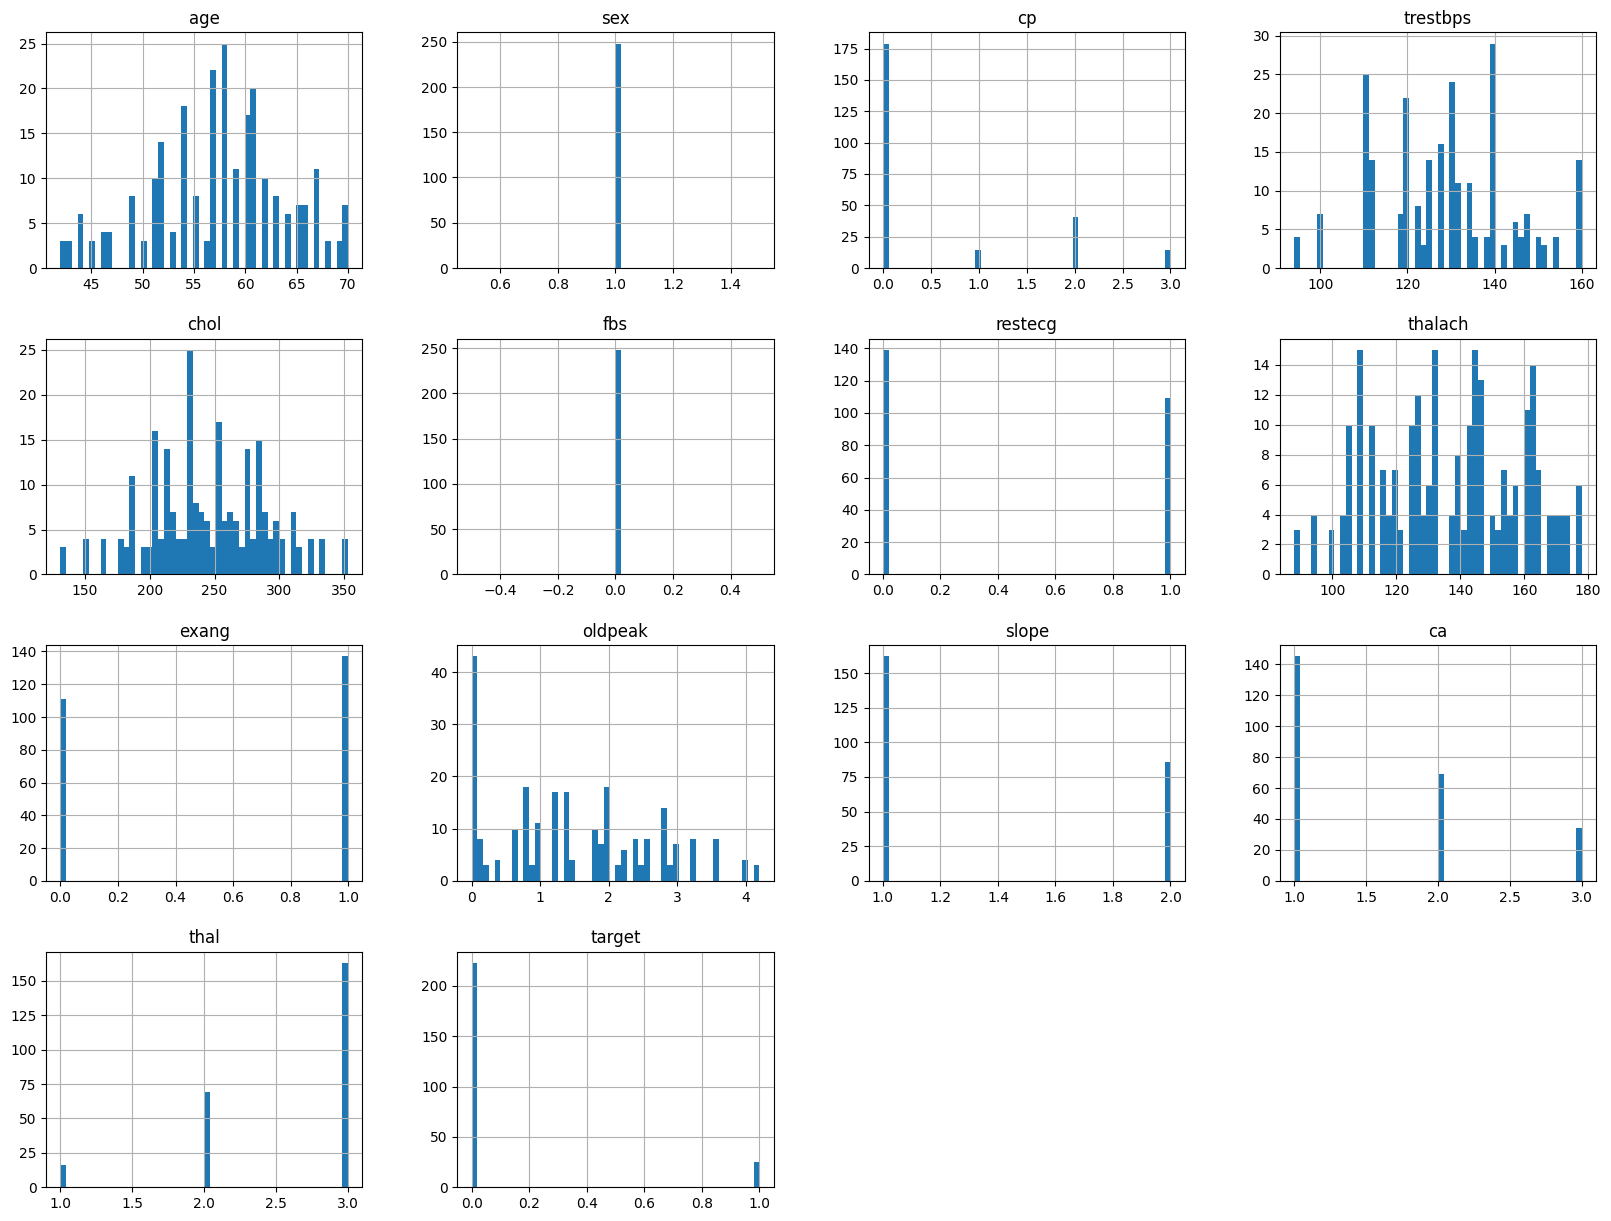

In [46]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

Informasi dari histogram di atas:

Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel.

Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $1800.

Setengah harga berlian bernilai di bawah $2500.

Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.


**MULTIVARIATE ANALYSIS**

Analisis pada fitur kategori dan numerik

In [52]:
#cek rata-rata harga terhadap pengaruh masing-masing kategorikal fitur
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="age", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dari grafik tersebut insight yang diperoleh yaitu:
-Harga dari fitur cut hampir mirip. Sehingga fitur cut memiliki pengaruh yang kecil terhadap harga.

-Semakin rendah grade warna, justru harga diamond semakin tinggi.

-Semakin rendah grade clarity, justru harga diamond semakin tinggi.

-Simpulan: fitur kategori memiliki pengaruh terhadap harga diamond.

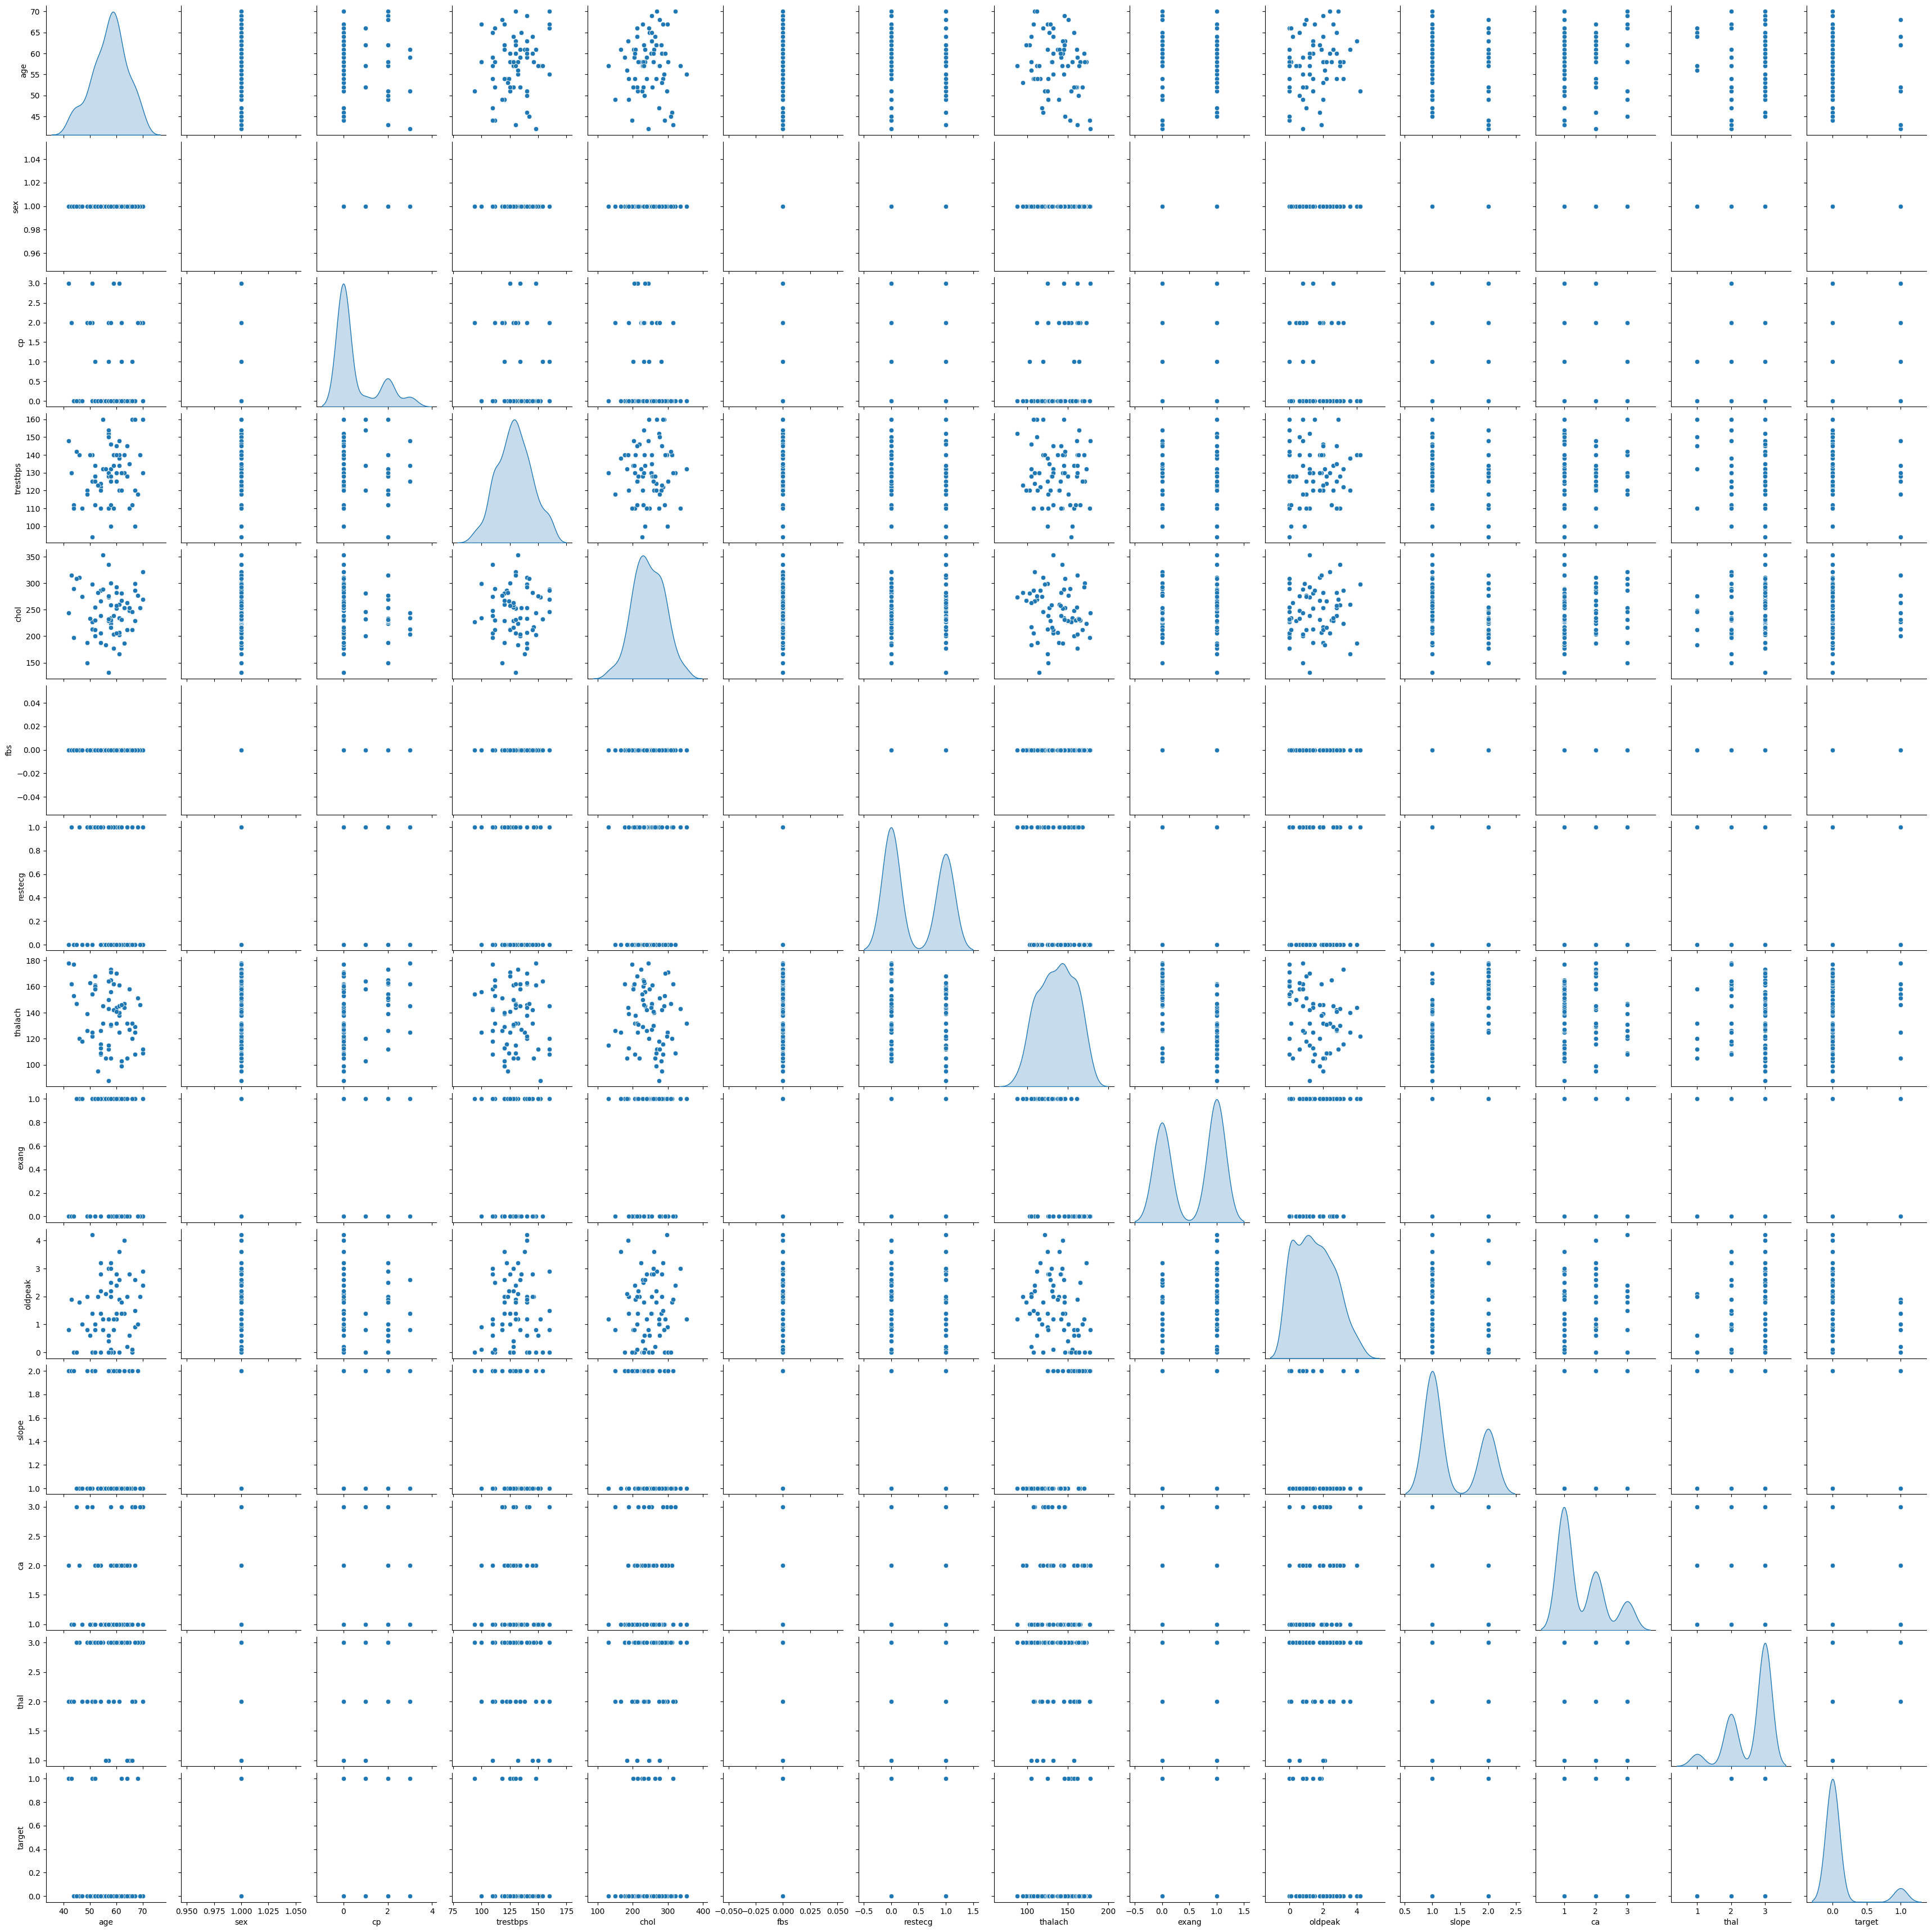

In [53]:
#mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

Relasi antara masing-masing fitur dengan target (price) tertera pada baris ke empat.

Hasil analisis:
fitur carat, x, y, z, memiliki korelasi yang kuat dengan price. Sedangkan table dan depth memiliki korelasi lemah (tidak membentuk pola)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

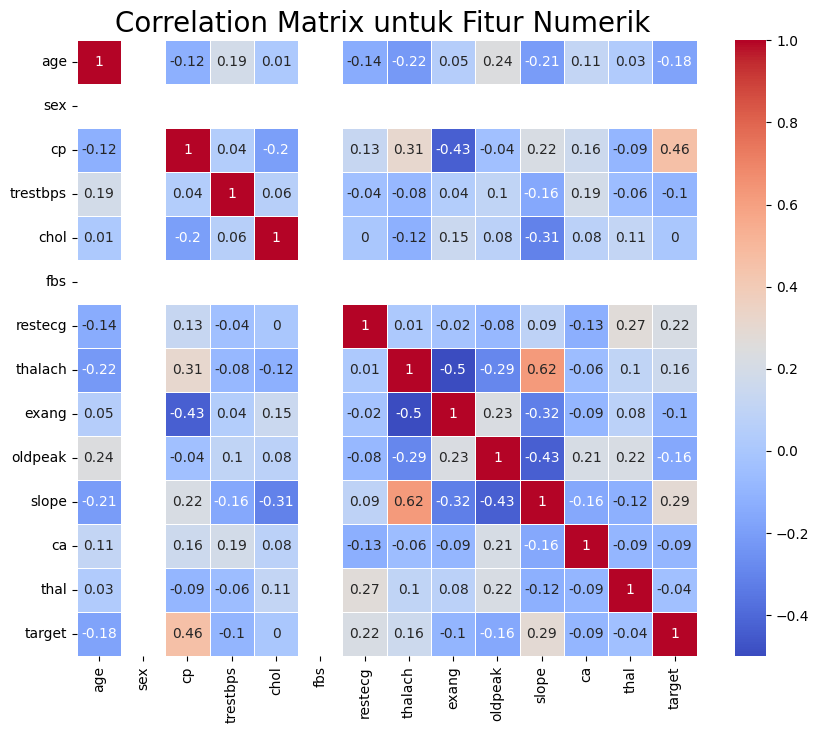

In [54]:
#evaluasai skor korelasi dengan fungsi corr()
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Keterangan matriks:

Koefisien korelasi mendekati 1 atau -1, menunjukkan kuatnya hubungan antara dua variabel  (menggambarkan korelasi positif atau negatif).

Koefisien korelasi mendekati 0 menunjukkan lemahnya hubungan antara dua variabel.

Hasil analisis:
Pada baris ke empat (sumbu y berupa 'price'), menunjukkan bahwa fitur carat, x, y, z, memiliki koefisien matriks mendekati 1 atau -1. Artinya fitu-fitur tersebut berkorelasi kuat dengan price.

Fitur depth memiliki korelasi yang kecil sehingga perlu di-drop.

In [56]:
diamonds.drop(['age'], inplace=True, axis=1)
diamonds.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
3,1,0,148,203,0,1,161,0,0.0,2,1,3,0
7,1,0,160,289,0,0,145,1,0.8,1,1,3,0
9,1,0,122,286,0,0,116,1,3.2,1,2,2,0
13,1,0,140,298,0,1,122,1,4.2,1,3,3,0


**DATA PREPARATION**

In [58]:
#Encoding Categorial Feature
#one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['slope'], prefix='slope', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['ca'], prefix='ca', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['thal'], prefix='thal', drop_first=True)], axis=1)
diamonds.drop(['slope','ca','thal'], axis=1, inplace=True)
diamonds.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,slope_2,ca_2,ca_3,thal_2,thal_3
0,1,0,125,212,0,1,168,0,1.0,0,1,1,0,0,1
3,1,0,148,203,0,1,161,0,0.0,0,1,0,0,0,1
7,1,0,160,289,0,0,145,1,0.8,0,0,0,0,0,1
9,1,0,122,286,0,0,116,1,3.2,0,0,1,0,1,0
13,1,0,140,298,0,1,122,1,4.2,0,0,0,1,0,1


Principal Component Analysis

PCA Reductional Dimensionality

Mengurangi fitur namun tetap mempertahankan informasi data

Mengubah fitur asli menjadi kumpulan fitur lain yang tidak berkorelasi linear.

In [61]:
print(diamonds.columns)


Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'target', 'slope_2', 'ca_2', 'ca_3', 'thal_2', 'thal_3'],
      dtype='object')


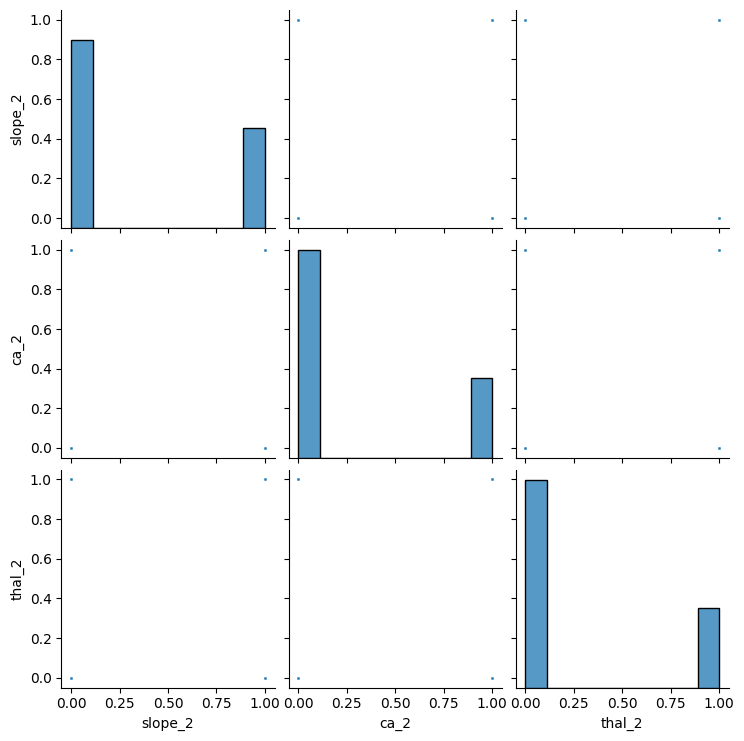

In [64]:
sns.pairplot(diamonds[['slope_2','ca_2','thal_2']], plot_kws={"s": 3});

In [70]:
print(diamonds.columns)


Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'target', 'slope_2', 'ca_2', 'ca_3', 'thal_2', 'thal_3'],
      dtype='object')


In [71]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['slope_2','ca_2','thal_2']])
princ_comp = pca.transform(diamonds[['slope_2','ca_2','thal_2']])

In [72]:
pca.explained_variance_ratio_.round(3)

array([0.433, 0.322, 0.245])

In [74]:
#reduksi fitur x, y, z, menjadi fitur ukuran berlian
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123) #jumlah komponen 1
pca.fit(diamonds[['slope_2','ca_2','thal_2']]) #fit model dengan data masukan
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('slope_2','ca_2','thal_2')]).flatten() #menambahkan fitur 'dimension'
diamonds.drop(['slope_2','ca_2','thal_2'], axis=1, inplace=True) #drop kolom x, y, z

In [78]:
print(diamonds.columns)


Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'target', 'ca_3', 'thal_3', 'dimension'],
      dtype='object')


In [80]:
#split dataset menjadi data train dan data test sebelum transformasi (supaya transformasi diterapkan hanya pada data latih)
from sklearn.model_selection import train_test_split

X = diamonds.drop(["oldpeak"], axis=1)
y = diamonds["oldpeak"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [81]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in whole dataset: {len(X_train)}')
print(f'Total # of sample in whole dataset: {len(X_test)}')

Total # of sample in whole dataset: 248
Total # of sample in whole dataset: 223
Total # of sample in whole dataset: 25


StandardScaler: standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dnegan nilai rata-rata, kemudian dibagi dengan deviasi standar.

In [85]:
#Standardisasi dengan StandardScaler pada data latih
from sklearn.preprocessing import StandardScaler


numerical_features = ['thalach', 'trestbps', 'chol']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,thalach,trestbps,chol
194,-1.296750,2.091431,0.930738
950,-1.296750,2.091431,0.930738
863,1.419360,-0.265430,-0.752998
584,-0.210306,0.205942,2.455202
625,0.423453,0.744653,0.202636


Standarisasi mengubah mean menjadi 0 dan standar deviasi menjadi 1

In [86]:
X_train[numerical_features].describe().round(4)

,thalach,trestbps,chol
count,223.0000,223.0000,223.0000
mean,0.0000,0.0000,0.0000
std,1.0022,1.0022,1.0022
min,-2.2021,-2.3529,-2.5960
25%,-0.7988,-0.6021,-0.7530
50%,0.1066,0.0713,-0.1387
75%,0.8309,0.7447,0.7715
max,1.8720,2.0914,2.4552


**MODEL DEVELOPMENT**

**KNN**

KNN memberi nilai data uji sesuai dengan seberapa mirip dengan data latih (kesamaan fitur).

Membandingkan jarak satu sampel ke sampel pelatihan berdasar sejumlah k-tetangga terdekat.

KNN bisa menerapkan klasifikasi maupun regresi.

In [87]:
#Siapkan data frame untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [88]:
#Latih dengna model KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

**RANDOM FOREST**

In [89]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

**ALGORITMA BOOSTING (ADABOOST)**

In [90]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**EVALUASI**

In [91]:
#Scaling data uji
# Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Evaluasi ketiga model dengan metrik MSE

In [92]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.000707,0.000835
RF,0.000006,0.000021
Boosting,0.000468,0.000391


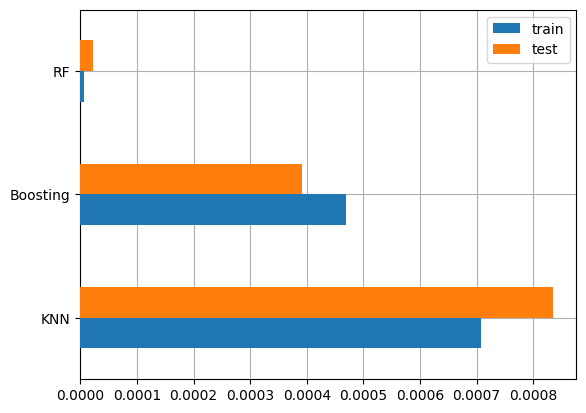

In [93]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Algoritma random forest memberikan error paling kecil.

In [94]:
#Uji model dengan data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
852,0.0,1.8,0.1,0.3
